#DATA WRANGLING

Data wrangling is a term often used to describe the early stages of the data analytics process. It involves transforming and mapping data from one format into another. The aim is to make data more accessible for things like business analytics or machine learning. The data wrangling process can involve a variety of tasks. These include things like data collection, exploratory analysis, data cleansing, creating data structures, and storage.

https://towardsdatascience.com/data-wrangling-using-pandas-library-ae26f8bbbdd2

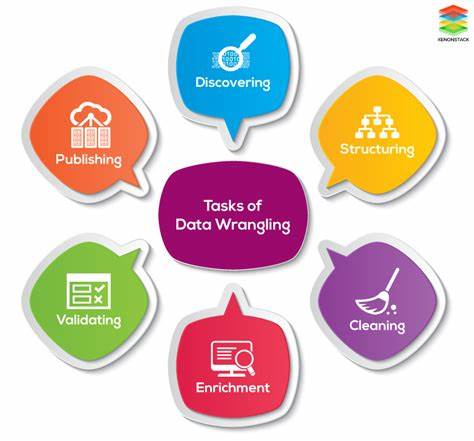

#Data Wrangling on Titanic Dataset

#Importing dataset using pandas

In [ ]:
import pandas as pd #importing the module
df=pd.read_csv('/content/train.csv')
print(df)
df.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Describe data

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

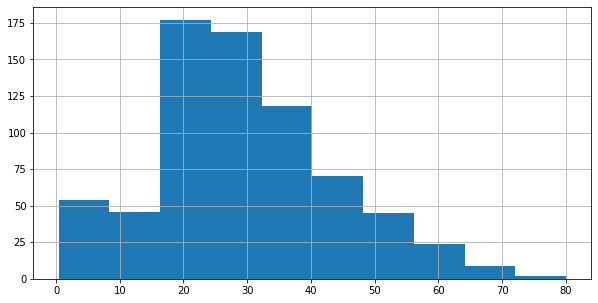

In [ ]:
df.Age.hist(figsize=(10,5))

In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.groupby('Gender').Age.value_counts()

Gender  Age 
female  24.0    16
        18.0    13
        22.0    12
        30.0    11
        35.0     8
                ..
male    57.0     1
        66.0     1
        70.5     1
        74.0     1
        80.0     1
Name: Age, Length: 145, dtype: int64

# Exploratory Data Analysis

In [ ]:
import plotly.express as px
fig = px.box(df,x='Survived',y='Age', color='Gender')
fig.show()

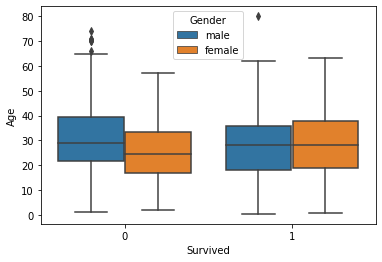

In [ ]:
import seaborn as sns
fig = sns.boxplot(data=df,x='Survived',y='Age',hue='Gender')


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


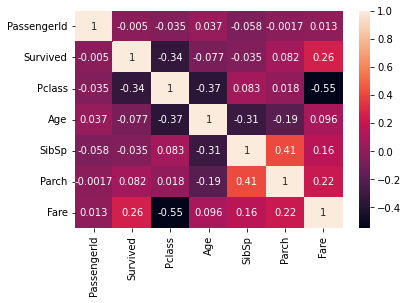

In [ ]:
import seaborn as sns
#sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(df.corr(),annot=True);


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax);

# Data Cleaning

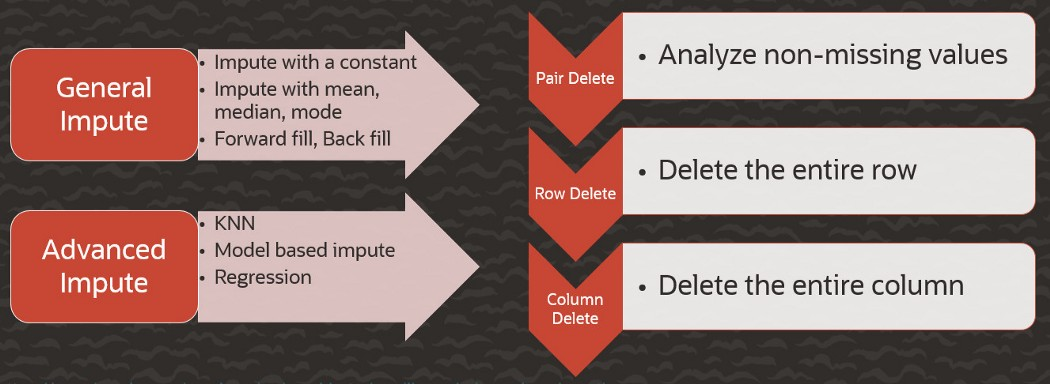

#Handling missing values

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Gender         False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# fill in the missing values in 'Age' column
age_mean_value=df['Age'].mean()
df['Age']=df['Age'].fillna(age_mean_value)
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
df.drop("Embarked",axis=1,inplace=True)
df.shape

(891, 11)

In [ ]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#Filtering data

In [ ]:
filtered_age = df[(df.Age>40) & (df.Gender=="female")]
filtered_age.shape

(48, 12)

In [ ]:
filtered_gender = df[df.Gender=='female']
filtered_gender.shape

(314, 11)

#Reshaping data

In [ ]:
# Categorize gender
df['Gender'] = df['Gender'].map({'male':0,'female':1})
# Display data
df



,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df['Survived'] = df['Survived'].map({0:'No',1:'Yes'})
# Display data
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,No,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85
2,3,Yes,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123
4,5,No,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN
887,888,Yes,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN
889,890,Yes,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

#sorting data

In [ ]:
# let's sort the column Name in ascending order
sorted_passengers = df.sort_values('Name',ascending=True,kind='merge')
# now print the sorted data
sorted_passengers.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin
845,846,No,3,"Abbing, Mr. Anthony",0,42.0,0,0,C.A. 5547,7.5500,NaN
746,747,No,3,"Abbott, Mr. Rossmore Edward",0,16.0,1,1,C.A. 2673,20.2500,NaN
279,280,Yes,3,"Abbott, Mrs. Stanton (Rosa Hunt)",1,35.0,1,1,C.A. 2673,20.2500,NaN
308,309,No,2,"Abelson, Mr. Samuel",0,30.0,1,0,P/PP 3381,24.0000,NaN
874,875,Yes,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,28.0,1,0,P/PP 3381,24.0000,NaN
365,366,No,3,"Adahl, Mr. Mauritz Nils Martin",0,30.0,0,0,C 7076,7.2500,NaN
401,402,No,3,"Adams, Mr. John",0,26.0,0,0,341826,8.0500,NaN
40,41,No,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,40.0,1,0,7546,9.4750,NaN
855,856,Yes,3,"Aks, Mrs. Sam (Leah Rosen)",1,18.0,0,1,392091,9.3500,NaN
207,208,Yes,3,"Albimona, Mr. Nassef Cassem",0,26.0,0,0,2699,18.7875,NaN


#<h1> Practice Questions
Automobile dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. 

In [ ]:
df=pd.read_csv('/content/automobile data.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Low,0,1


Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

"normalized-losses": 41 missing data
"num-of-doors": 2 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data
"price": 4 missing data



1.   Find missing values
2.   Replace by mean:peak_rpm, bore, stroke
3.   Replace by frequency:"num-of-doors": 2 missing data, replace them with "four".
4.   Plot histogram of horsepower
5.   Plot correlation heatmap







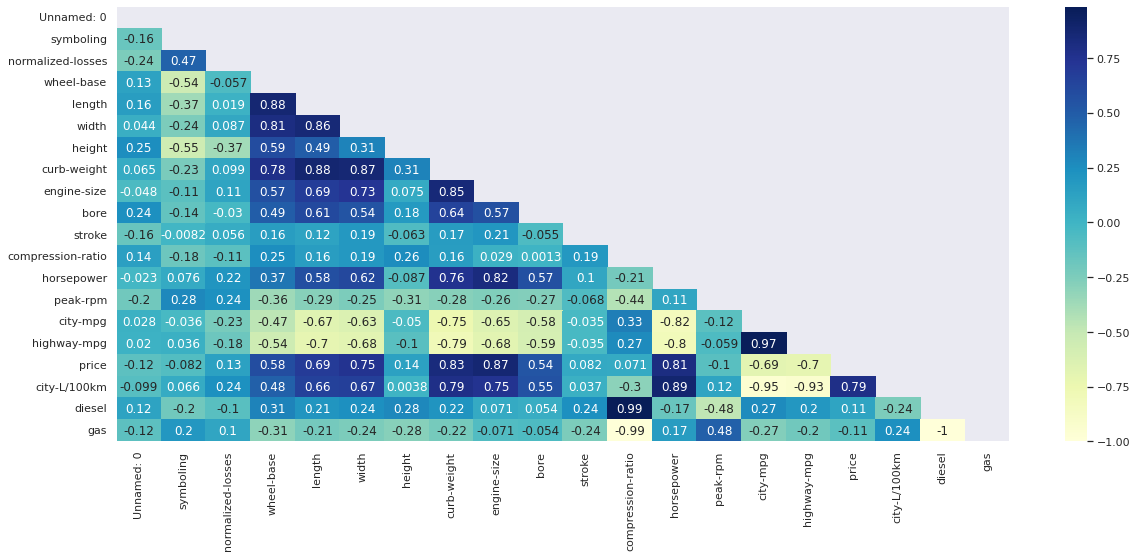

In [ ]:
import seaborn as sns
import numpy as np

sns.set(rc={"figure.figsize":(20,8)})
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,mask=mask);